NumPy的主要对象是同构多维数组。

今天涉及

1. 多维数组对象ndarray，它是一个快速而灵活的容器，可以容纳大量的数据，支持各种数学运算。

2. 用于数组操作的函数和方法，包括形状操作、基本线性代数等。

3. 用于数组操作的广播功能，可以在不同大小的数组之间进行算术运算。

In [2]:
import numpy as np

In [18]:
a=np.arange(15).reshape(3,5)#arange生成一维数组，reshape将一维数组转换成3行5列的二维数组
print(a)
print(a.ndim)#数组的轴（维度）的个数。在Python世界中，维度的数量被称为rank
print(a.shape)#数组的维度。表示每个维度中数组的大小。对于有 n 行和 m 列的矩阵，shape 将是 (n,m)。因此，shape 元组的长度就是rank或维度的个数 ndim。
print(a.size)#数组元素的总数。这等于 shape 的元素的乘积。
print(a.dtype)#数组中元素类型的对象。
print(a.itemsize)#数组中每个元素的字节大小。ndarray.itemsize=ndarray.dtype.itemsize.一个字节占8位二进制，int64表示一个整型数占64位
print(a.dtype.itemsize)
print(type(a))#获取数据类型
print(a.data)
b=a.astype(float)#修改数据类型
print(type(b),b.dtype)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
2
(3, 5)
15
int64
8
8
<class 'numpy.ndarray'>
<class 'numpy.ndarray'> float64


# 数组创建

可以使用array函数从常规Python列表或元组中创建数组。得到的数组的类型是从Python列表中元素的类型推导出来的。

In [20]:
a = np.array([2,3,4])
print(a)
print(a.dtype)
b = np.array([1.2, 3.5, 5.1])
print(b)
print(b.dtype)

[2 3 4]
int64
[1.2 3.5 5.1]
float64


一个常见的错误，就是调用array的时候传入多个数字参数，而不是提供单个数字的列表类型作为参数。

In [21]:
a = np.array(1,2,3,4)
a

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [23]:
a = np.array([1,2,3,4])
a

dtype('int64')

In [24]:
#可以在创建时显式指定数组的类型
b= np.array( [ [1,2], [3,4] ], dtype=complex)#complex复数类型
b

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [28]:
c= np.array([(1.5,2,3), (4,5,6)])
print(c.dtype)
print(c)

float64
[[1.5 2.  3. ]
 [4.  5.  6. ]]


通常，数组的元素最初是未知的，但它的大小是已知的。因此，NumPy提供了几个函数来创建具有初始占位符内容的数组。这就减少了数组增长的必要.

In [29]:
np.zeros( (3,4) )#函数zeros创建一个由0组成的数组

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [30]:
np.ones( (2,3,4), dtype=np.int16 )#函数 ones创建一个由1组成的数组

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [31]:
np.empty( (2,3) )
#函数empty 创建一个数组，其初始内容是随机的，取决于内存的状态。默认情况下，创建的数组的dtype是 float64 类型的。

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

为了创建数字组成的数组，NumPy提供了一个类似于range的函数，arange,该函数返回数组而不是列表。

In [32]:
np.arange( 10, 30, 5 )

array([10, 15, 20, 25])

In [41]:
np.arange( 0, 2, 0.3) 

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [319]:
#使用linspace函数来接收想要的元素数量的函数，而不是步长（step）
from numpy import pi#pi=3.141592653589793
np.linspace( 0, 2, 9 )
#linespace函数用来创建等差数列

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
start：样本数据开始点。

stop：样本数据结束点。

num：生成的样本数据量，默认为50。

endpoint：默认为True，包含stop；若为False，则不包含stop。

retstep：默认为False。若为True，则结果会给出数据间隔，array([])变成了(array([]),step)

其中sample的数据类型是numpy.ndarray，step的数据类型是float

dtype：输出数组类型，可以选择输出的数组是整型还是浮点型或者布尔型。

axis：默认为0。可以选择-1

In [47]:
x = np.linspace( 0, 2*pi, 100 )
f = np.sin(x)
print(x)
print(f)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

# 打印数组

打印数组时，NumPy以与嵌套列表类似的方式显示它，但具有以下布局：

最后一个轴从左到右打印，
倒数第二个从上到下打印，
其余部分也从上到下打印，每个切片用空行分隔。
然后将一维数组打印为行，将二维数据打印为矩阵，将三维数据打印为矩数组表。

In [53]:
c = np.arange(24).reshape(2,3,4)
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [63]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
c=a-b
print(a)
print(a<35)
print(b)
print(c)

[20 30 40 50]
[ True  True False False]
[0 1 2 3]
[20 29 38 47]


乘积运算符*在NumPy数组中按元素进行运算。矩阵乘积可以使用@运算符（在python> = 3.5中）或dot函数执行

In [81]:
A = np.array( [[1,1],
                [0,1]] )
B = np.array( [[2,0],
                [3,4]] )
print(A*B)
print(A@B)
print(A.dot(B))
print(B.dot(A))

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]
[[2 2]
 [3 7]]


某些操作（例如+=和 *=）会更直接更改被操作的矩阵数组而不会创建新矩阵数组

In [78]:
a = np.ones((2,3),dtype=int)
b = np.random.random((2,3))#np.random.random()函数,生成2行3列的浮点数，浮点数从0-1中随机
print(a)
print(b)

[[1 1 1]
 [1 1 1]]
[[0.90134371 0.93039085 0.89850082]
 [0.15823554 0.67180624 0.14166985]]


In [79]:
a*=3#再次运行则在乘以3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [80]:
b+=a
b

array([[3.90134371, 3.93039085, 3.89850082],
       [3.15823554, 3.67180624, 3.14166985]])

In [82]:
a+=b
a
#不能将浮点型转化为整型进行运算

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

当使用不同类型的数组进行操作时，结果数组的类型对应于更一般或更精确的数组（称为向上转换的行为）

In [85]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0,pi,3)
print(b)
print(b.dtype)

[0.         1.57079633 3.14159265]
float64


In [87]:
c=a+b
print(c)
print(c.dtype)

[1.         2.57079633 4.14159265]
float64


In [100]:
d = np.exp(c*1j)#np.exp(x)e的x次方
print(d)
print(d.dtype)

[ 0.54030231+0.84147098j -0.84147098+0.54030231j -0.54030231-0.84147098j]
complex128


许多一元操作，例如计算数组中所有元素的总和，都是作为ndarray类的方法实现的

In [97]:
a = np.random.random((2,3))
print(a,'\n')
print(a.sum(),'\n')
print(a.min(),'\n')
print(a.max())

[[0.10940978 0.83911591 0.80674022]
 [0.76572109 0.16939337 0.92798062]] 

3.6183609961969765 

0.10940977944775021 

0.9279806163444353


默认情况下，上述操作适用于数组，就像它是一个数字列表一样，无论其形状如何。但是，通过指定axis 参数，您可以沿数组的指定轴应用操作

In [98]:
b = np.arange(12).reshape(3,4)
print(b,'\n')
print(b.sum(axis=0),'\n')
print(b.min(axis=1),'\n')
print(b.cumsum(axis=1))#每一列进行累加

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[12 15 18 21] 

[0 4 8] 

[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


# 通函数

NumPy提供熟悉的数学函数，例如sin，cos和exp。在NumPy中，这些被称为“通函数”（ufunc）。在NumPy中，这些函数在数组上按元素进行运算，产生一个数组作为输出。

In [103]:
B = np.arange(3)
print(B,'\n')
print(np.exp(B),'\n')
print(np.sqrt(B),'\n')#np.sqrt()开方
C = np.array([2., -1., 4.])
print(np.add(B,C))

[0 1 2] 

[1.         2.71828183 7.3890561 ] 

[0.         1.         1.41421356] 

[2. 0. 6.]


# 索引、切片和迭代

一维的数组可以进行索引、切片和迭代操作的，就像列表和其他Python序列类型一样。

In [118]:
a = np.arange(10)**3#每个元素的3次方
print(a,'\n')
print(a[2],'\n')
print(a[2:5],'\n')
a[:6:2]=-100#0到6的元素每隔两步改为-100
print(a,'\n')
print(a[::-1],'\n')#反转
for i in a:
    print(i**(1/3.))#负数的0.333333333333次方报错

[  0   1   8  27  64 125 216 343 512 729] 

8 

[ 8 27 64] 

[-100    1 -100   27 -100  125  216  343  512  729] 

[ 729  512  343  216  125 -100   27 -100    1 -100] 

[-100    1 -100   27 -100  125  216  343  512  729]
nan
1.0
nan
3.0
nan
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


/var/folders/vm/h5dhfh1x1q1b3l5nx_pwlbl00000gn/T/ipykernel_14388/4202980317.py:10: RuntimeWarning: invalid value encountered in power
  print(i**(1/3.))


多维的数组每个轴可以有一个索引。这些索引以逗号​​分隔的元组给出：

In [137]:
def f(x,y):
        return 10*x+y

In [143]:
'''numpy.fromfunction()函数通过对每个坐标执行一个函数来构造一个数组，因此生成的数组在坐标 (x, y, z) 处具有值 fn(x, y, z)。
语法：numpy.fromfunction（函数，形状，dtype）'''
b = np.fromfunction(f,(5,4),dtype=int)
print(b,'\n')
print(b[2,3],'\n')#下标为(2,3)的数
print(b[0:5, 1],'\n')#下标为0到5的行中的第二列数，不包含下标为5的那一行
print(b[ : ,1],'\n')#同上
print(b[1:3, : ])#下标为1到下标为3的行中的所有数，不包含下标为3的那一行

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]] 

23 

[ 1 11 21 31 41] 

[ 1 11 21 31 41] 

[[10 11 12 13]
 [20 21 22 23]]


当提供的索引少于轴的数量时，缺失的索引被认为是完整的切片
b[i] 方括号中的表达式 i 被视为后面紧跟着 : 的多个实例，用于表示剩余轴。NumPy也允许使用三个点写为 b[i,...]。
三个点（ ... ）表示产生完整索引元组所需的冒号    

In [146]:
print(b[-1],'\n')
print(b[1,...],'\n')
print(b[...,2])

[40 41 42 43] 

[10 11 12 13] 

[ 2 12 22 32 42]


对多维数组进行迭代是相对于第一个轴完成的但是，如果想要对数组中的每个元素执行操作，可以使用flat属性，该属性是数组的所有元素的迭代器

In [147]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


In [148]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


# 形状操纵

一个数组的形状是由每个轴的元素数量决定的,可以使用各种命令更改数组的形状。

In [177]:
a = np.floor(10*np.random.random((3,4)))
print(a,'\n')
print(a.ravel(),'\n')#使用ravel()让矩阵变为一维数组
#a=a.resize((2,6))
#print(a,'\n')
print(a.reshape(2,6),'\n')
print(a,'\n')
print(a.resize((2,6)),'\n')
print(a)

[[6. 6. 5. 8.]
 [0. 1. 1. 7.]
 [6. 7. 6. 9.]] 

[6. 6. 5. 8. 0. 1. 1. 7. 6. 7. 6. 9.] 

[[6. 6. 5. 8. 0. 1.]
 [1. 7. 6. 7. 6. 9.]] 

[[6. 6. 5. 8.]
 [0. 1. 1. 7.]
 [6. 7. 6. 9.]] 

None 

[[6. 6. 5. 8. 0. 1.]
 [1. 7. 6. 7. 6. 9.]]


区别

resize 无返回值（返回值为None），会改变原数组。

reshape 有返回值，返回值是被reshape后的数组，不会改变原数组。

resize 可以放大或者缩小原数组的形状：放大时，会用0补全剩余元素；缩小时，直接丢弃多余元素。

reshape 要求reshape前后元素个数相同，否则会报错，无法运行。

In [243]:
#数组沿不同的轴堆叠在一起
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print(a,'\n')
print(b,'\n')
print("***************")
print(np.stack((a,b)))#在一个新维度上连接多个array
print("***************")
print(np.vstack((a,b)),'\n')
print(np.hstack((a,b)))

[[7. 0.]
 [3. 0.]] 

[[5. 2.]
 [2. 6.]] 

***************
[[[7. 0.]
  [3. 0.]]

 [[5. 2.]
  [2. 6.]]]
***************
[[7. 0.]
 [3. 0.]
 [5. 2.]
 [2. 6.]] 

[[7. 0. 5. 2.]
 [3. 0. 2. 6.]]


In [230]:
#将column_stack 一维数组作为列堆叠到二维数组中。它仅相当于 hstack二维数组
from numpy import newaxis#newaxis用于增加矩阵维度

In [231]:
np.column_stack((a,b))#形成二维数组，列拼接在一起

array([[9., 4., 4., 1.],
       [1., 0., 6., 1.]])

In [238]:
c=np.arange(3)
d=np.arange(3)
print(np.hstack((c,d)),'\n')
print(np.column_stack((c,d)))

[0 1 2 0 1 2] 

[[0 0]
 [1 1]
 [2 2]]


由此看出，对于一维数组的堆叠：

（1）column_stack()会将一位数组转化成二维数组后再进行堆叠；

（2）hstack()不会进行转化，而是直接进行堆叠，所得到的堆叠后的数组还是一维数组。

对于二维数组的堆叠，两者结果一样

同理，vstack()与row_stack()类似

In [204]:
a = np.array([4.,2.])
b = np.array([3.,8.])
print(a,'\n')
print(np.column_stack((a,b)))

[4. 2.] 

[[4. 3.]
 [2. 8.]]


In [198]:
a[:,newaxis]#一维变成二维

array([[4.],
       [2.]])

In [199]:
a[newaxis,:]

array([[4., 2.]])

In [222]:
b=np.arange(20).reshape(4,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [223]:
b[:,newaxis]

array([[[ 0,  1,  2,  3,  4]],

       [[ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19]]])

In [224]:
b[newaxis,:]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

In [246]:
#r_和c_也可以用来堆叠数组，允许使用范围操作符(“：”)
print(np.r_[1:4,0,4],'\n')
print(np.c_[1:4,1:4])

[1 2 3 0 4] 

[[1 1]
 [2 2]
 [3 3]]


## 将一个数组拆分成几个较小的数组

使用hsplit，可以沿数组的水平轴拆分数组，方法是指定要返回的形状相等的数组的数量，或者指定应该在其之后进行分割的列

vsplit沿垂直轴分割，并array_split允许指定要分割的轴。

In [253]:
a=np.arange(20).reshape(4,5)
print(np.hsplit(a,5),'\n')
print(np.vsplit(a,4))

[array([[ 0],
       [ 5],
       [10],
       [15]]), array([[ 1],
       [ 6],
       [11],
       [16]]), array([[ 2],
       [ 7],
       [12],
       [17]]), array([[ 3],
       [ 8],
       [13],
       [18]]), array([[ 4],
       [ 9],
       [14],
       [19]])] 

[array([[0, 1, 2, 3, 4]]), array([[5, 6, 7, 8, 9]]), array([[10, 11, 12, 13, 14]]), array([[15, 16, 17, 18, 19]])]


In [278]:
a=np.arange(12)
b=a
print(a,'\n',b)

[ 0  1  2  3  4  5  6  7  8  9 10 11] 
 [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [279]:
#完全不复制，简单赋值不创建新的副本
b.shape=3,4
print(a.shape)
print(a)

(3, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [280]:
b is a

True

In [281]:
def f(x):
     print(id(x))#id(x)查看变量在内存中的地址

In [282]:
print(id(a),'\n')
print(f(a))#不带参数的return语句，返回None

140649054682736 

140649054682736
None


# 视图或浅拷贝

视图是数据的一个别称或引用，通过该别称或引用亦便可访问、操作原有数据

不同的数组对象可以共享相同的数据。该view方法创建一个查看相同数据的新数组对象。

In [283]:
c=a.view()
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [284]:
c is a

False

In [285]:
c.base is a#c是以a的数据为基础创建的对象（base对象说明数据是否来自别的对象）

True

In [286]:
c.flags.owndata#ndarray.flags.owndata判断数组是否是数据的所有者

False

In [287]:
c.shape=2,6
a.shape#a形状不变

(3, 4)

In [288]:
c[0,4]=123
a#数据改变

array([[  0,   1,   2,   3],
       [123,   5,   6,   7],
       [  8,   9,  10,  11]])

In [290]:
#切片数组会返回一个视图
s=a[:,1:3]
s[:]=10
a

array([[  0,  10,  10,   3],
       [123,  10,  10,   7],
       [  8,  10,  10,  11]])

# 深拷贝

深拷贝在计算机中开辟一块新的内存地址用于存放复制的对象。源数据改变不会影响复制的数据

In [292]:
#copy方法生成数组及其数据的完整副本
d=a.copy()
d is a

False

In [293]:
d.base is a

False

In [294]:
d[1,3]=999
a
#d的改变对a没有影响

array([[  0,  10,  10,   3],
       [123,  10,  10,   7],
       [  8,  10,  10,  11]])

In [295]:
#如果不再需要原始数组，则应在切片后调用 copy
a=np.arange(12).reshape(2,6)
b=a[:3].copy()
del a
a
#如果改为使用 b = a[:100]，则 a 由 b 引用，并且即使执行 del a 也会在内存中持久存在。

NameError: name 'a' is not defined

# 广播

广播规则的基本原则如下：

1. 如果两个数组的维度数不同，则将维度较少的数组的形状在前面补1，直到维度数相同。

2. 如果两个数组在某个维度上的形状不同，但其中一个数组的形状在该维度上为1，则可以将该数组在该维度上的形状扩展为与另一个数组相同。

3. 如果两个数组在某个维度上的形状不同，且两个数组在该维度上的形状都不为1，则无法进行广播，会抛出ValueError异常。


# 花式索引和索引技巧

NumPy提供比常规Python序列更多的索引功能。除了通过整数和切片进行索引之外，数组可以由整数数组和布尔数组索引。

## 使用索引数组进行索引

In [297]:
a = np.arange(12)**2 
i = np.array( [ 1,1,3,8,5 ] ) 
print(a,'\n',a[i])

[  0   1   4   9  16  25  36  49  64  81 100 121] 
 [ 1  1  9 64 25]


In [298]:
j = np.array( [ [ 3, 4], [ 9, 7 ] ] )  
a[j]

array([[ 9, 16],
       [81, 49]])

当索引数组a是多维的时，单个索引数组指的是第一个维度a。以下示例通过使用调色板将标签图像转换为彩色图像来显示此行为。

In [301]:
palette = np.array([[0, 0, 0],         # black
                     [255, 0, 0],       # red
                     [0, 255, 0],       # green
                     [0, 0, 255],       # blue
                    [255, 255, 255]])  # white
image = np.array([[0, 1, 2, 0],        # 每个值对应调色板中的一个颜色,一个数对应一行
                   [0, 3, 4, 0]])
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

In [303]:
#为多个维度提供索引。每个维度的索引数组必须具有相同的形状
a = np.arange(12).reshape(3,4)
i = np.array( [ [0,1],                        # 行索引
                [1,2] ] )
j = np.array( [ [2,1],                        # 列索引
                [3,3] ] )
print(a,'\n')
print(a[i,j])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[[ 2  5]
 [ 7 11]]


In [304]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [305]:
a[:,j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

In [315]:
#可以按顺序（比如列表）放入i，j然后使用列表进行索引。
l=[i,j]
a[l]
#不推荐使用非元组序列进行多维索引;使用 ‘arr[Tuple（seq）]’ 而不是 ‘arr[seq]’。将来，这将被解释为数组索引’arr[np.array（seq）]'，这将导致错误或不同的结果。

/var/folders/vm/h5dhfh1x1q1b3l5nx_pwlbl00000gn/T/ipykernel_14388/401603926.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  a[l]


array([[ 2,  5],
       [ 7, 11]])

In [316]:
#不能通过放入i和j放入数组来实现这一点，因为这个数组将被解释为索引a的第一个维度。
s = np.array( [i,j] )
a[s]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [317]:
a[tuple(s)]

array([[ 2,  5],
       [ 7, 11]])

In [321]:
#使用数组索引的另一个常见用法是搜索与时间相关的系列的最大值：
time = np.linspace(20, 145, 5)#创建等差数列
data = np.sin(np.arange(20)).reshape(5,4)
print(time,'\n\n',data)

[ 20.    51.25  82.5  113.75 145.  ] 

 [[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]


In [323]:
ind = data.argmax(axis=0)#每一行最大值对应索引
ind

array([2, 0, 3, 1])

In [324]:
time_max = time[ind]#ind对应time中的数据
data_max = data[ind, range(data.shape[1])]#data[ind[0],0], data[ind[1],1]...
time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [326]:
data_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [327]:
np.all(data_max == data.max(axis=0))#np.all(np.array)   对矩阵所有元素做与操作，所有为True则返回True

True

In [333]:
#使用数组索引作为分配给的目标
a = np.arange(5)
print(a,'\n')
a[[1,3,4]] = 0
print(a)

[0 1 2 3 4] 

[0 0 2 0 0]


In [330]:
#当索引列表包含重复时，分配会多次完成，留下最后一个值
a = np.arange(5)
a[[0,0,2]]=[1,2,3]
a

array([2, 1, 3, 3, 4])

In [334]:
#使用Python的 +=构造,它可能不会按预期执行
a = np.arange(5)
a[[0,0,2]]+=1
a
#0在索引列表中出现两次，第0个元素也只增加一次

array([1, 1, 3, 3, 4])

## 使用布尔数组进行索引

In [337]:
#布尔索引，明确地选择想要的数组中的哪些项目以及我们不需要的项目
a = np.arange(12).reshape(3,4)
print(a,'\n')
b=a>4
print(b,'\n')
print(a[b])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]] 

[ 5  6  7  8  9 10 11]


In [338]:
#在分配中非常有用
a[b]=0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

In [339]:
#使用布尔值进行索引的第二种方法更类似于整数索引; 对于数组的每个维度，给出一个一维布尔数组，选择想要的切片
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])            
b2 = np.array([True,False,True,False])
a[b1,:] 

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [340]:
a[b1]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [341]:
a[:,b2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [343]:
a[b1,b2]

array([ 4, 10])

注意：1D布尔数组的长度必须与要切片的尺寸（或轴）的长度一致。在前面的例子中，b1具有长度为3（的数目 的行 中a），和 b2（长度4）适合于索引的第二轴线（列） a。

# ix_()函数

In [344]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [345]:
bx

array([[[8],
        [5],
        [4]]])

In [346]:
cx

array([[[5, 4, 6, 8, 3]]])

ax的shape为(4,1,1)，bx的shape为(1,3,1)，cx的shape为(1,1,5)。这是因为在广播操作中，每个数组的形状必须相同或其中一个数组的形状为1，才能进行广播。
具体来说，ax的形状为(4,1,1)表示它可以与一个形状为(4,3,5)的三维数组进行广播操作，其中bx和cx的长度为1的维度会被自动扩展为3和5。同理，bx的形状为(1,3,1)表示它可以与一个形状为(4,3,5)的三维数组进行广播操作
其中ax和cx的长度为1的维度会被自动扩展为4和5。最后，cx的形状为(1,1,5)表示它可以与一个形状为(4,3,5)的三维数组进行广播操作，其中ax和bx的长度为1的维度会被自动扩展为4和3。

In [347]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [348]:
result = ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [349]:
result[3,2,4]

17

In [350]:
a[3]+b[2]*c[4]

17

In [351]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

In [352]:
ufunc_reduce(np.add,a,b,c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

这个函数使用了NumPy的`ix_`函数，它将输入的向量转换为一个元组，其中每个元素都是一个切片对象，这些切片对象可以用于高效地访问输入向量的元素。

然后，函数使用一个循环来迭代所有的切片对象，并使用给定的ufct函数对它们进行归约操作。在每次迭代中，函数将当前的归约结果和下一个切片对象传递给ufct函数，并将返回的结果存储在r变量中。

最后，函数返回r变量，它包含了所有输入向量的归约结果。在这个例子中，ufunc_reduce函数使用了np.add函数作为ufct参数，因此它返回了a、b和c向量的元素之和。

（归约操作是指将一个复杂的表达式或问题简化为更简单的形式的过程。在使用ufct函数时，归约操作可以将输入的函数表达式转化为更简单的形式）

# 简单数组操作

In [353]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
a

array([[1., 2.],
       [3., 4.]])

In [355]:
a.transpose()#矩阵转置

array([[1., 3.],
       [2., 4.]])

In [356]:
np.linalg.inv(a)#线性代数函数，用于计算矩阵a的逆矩阵，如果矩阵a不可逆，则会引发LinAlgError异常

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [358]:
u = np.eye(2)#用来创建一个2x2的单位矩阵的函数
u

array([[1., 0.],
       [0., 1.]])

In [359]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
j @ j#进行矩阵乘法运算     

array([[-1.,  0.],
       [ 0., -1.]])

In [360]:
np.trace(u)#用于计算矩阵的迹。迹是矩阵对角线上元素的和。

2.0

In [361]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

该函数用于求解线性方程组 Ax = y，其中 a 是系数矩阵，y 是常数向量。返回值是解向量 x。

在本例中，a 是一个 2x2 的矩阵，y 是一个 2x1 的向量。因此，np.linalg.solve(a, y) 将求解以下线性方程组：

2x + 3y = 5

4x + 5y = 7

函数的输出将是一个 2x1 的向量，表示方程组的解。

In [362]:
np.linalg.eig(j)#求解矩阵j的特征值和特征向量

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

特征值是一个标量，表示矩阵在某个方向上的拉伸或压缩程度。特征向量是一个非零向量，表示在该方向上的拉伸或压缩方向。特征向量与特征值是一一对应的。

求解矩阵的特征值和特征向量的方法是解决矩阵的特征方程，即：

(A-λI)x=0

其中，A是一个n阶方阵，λ是一个标量，I是n阶单位矩阵，x是一个非零向量。解特征方程可以得到矩阵的n个特征值λ1，λ2，…，λn，以及对应的n个特征向量x1，x2，…，xn。

# 技巧和提示

## “自动”整型

要更改数组的尺寸，可以省略其中一个尺寸，然后自动推导出尺寸

In [363]:
a = np.arange(30)
a.shape = 2,-1,3
a.shape
'''
在这个例子中，我们将数组的第一个维度设置为2，第三个维度设置为3，而第二个维度使用-1。
这意味着numpy会自动计算第二个维度的大小，以使数组的总大小保持不变。在这种情况下，第二个维度的大小为5，
因此新数组的形状为(2,5,3)。
'''

(2, 5, 3)

In [364]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

## 矢量堆叠

NumPy中的矢量堆叠是指将多个数组沿着一个新的轴堆叠在一起，形成一个新的数组。NumPy提供了几个函数来实现矢量堆叠，包括vstack、hstack、dstack和concatenate。
1. vstack函数：将多个数组沿着垂直方向堆叠在一起，形成一个新的数组。

2. hstack函数：将多个数组沿着水平方向堆叠在一起，形成一个新的数组。

3. dstack函数：将多个数组沿着深度（第三个维度）方向堆叠在一起，形成一个新的数组（三维）

4. concatenate函数：可以沿着任意一个轴堆叠多个数组，形成一个新的数组，默认按行连接

In [365]:
#dstack函数
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.dstack((a, b))
c

array([[[1, 4],
        [2, 5],
        [3, 6]]])

In [367]:
#concatenate函数
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.concatenate((a, b))
c

array([1, 2, 3, 4, 5, 6])

# 直方图

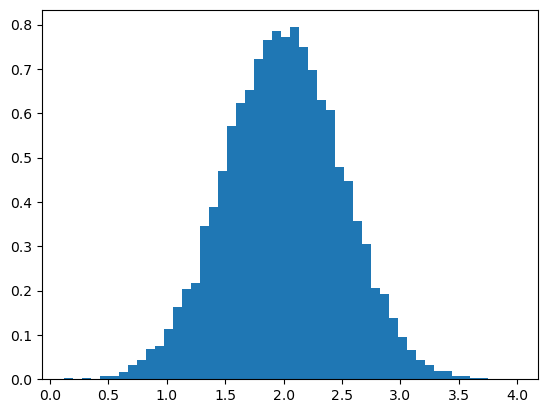

In [370]:
import matplotlib.pyplot as plt
mu, sigma = 2, 0.5
#mu和sigma是正态分布的两个参数，分别代表均值和标准差。
v = np.random.normal(mu,sigma,10000)
plt.hist(v, bins=50, density=1)
plt.show()

numpy可以使用`numpy.histogram()`函数来构建直方图，该函数可以返回直方图的频数和区间边界。而matplotlib可以使用`matplotlib.pyplot.hist()`函数来构建直方图，该函数可以直接绘制出直方图，并且可以进行更多的自定义设置。

mu和sigma是正态分布的两个参数，分别代表均值和标准差。在这里，mu=2表示正态分布的均值为2，sigma=0.5表示正态分布的标准差为0.5。

生成了一个正态分布的随机数序列，并用直方图对其进行可视化。其中，mu和sigma分别代表正态分布的均值和标准差，v是生成的随机数序列，plt.hist()函数用于绘制直方图，bins参数指定直方图的柱子数量，density参数指定是否将直方图归一化为概率密度函数。最后，plt.show()函数用于显示绘制的图形。